<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Real_time_Drowsiness_Detection(MRL_DataSet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedzaghl0ul","key":"6abd982d853a478b86db96d1b5bf7872"}'}

In [5]:
!mkdir -p ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d akashshingha850/mrl-eye-dataset

Dataset URL: https://www.kaggle.com/datasets/akashshingha850/mrl-eye-dataset
License(s): MIT
 89% 292M/329M [00:00<00:00, 939MB/s] 
100% 329M/329M [00:00<00:00, 913MB/s]


In [9]:
!unzip -q mrl-eye-dataset.zip

In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
base_dir = r"/content/data"
train_dir = base_dir + r"/train"
val_dir = base_dir + r"/val"
test_dir = base_dir + r"/test"

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 50937 images belonging to 2 classes.
Found 16980 images belonging to 2 classes.
Found 16981 images belonging to 2 classes.


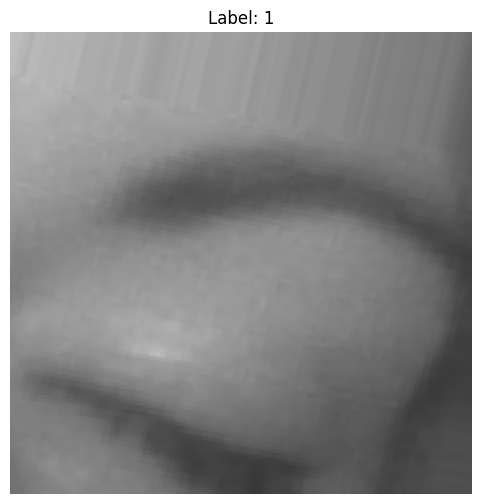

In [15]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the training generator
images, labels = next(train_generator)

# Display the first image in the batch
plt.figure(figsize=(6, 6))
plt.imshow(images[0])
plt.title(f"Label: {int(labels[0])}")
plt.axis('off')
plt.show()

In [16]:
print(train_generator.class_indices)

{'awake': 0, 'sleepy': 1}


In [17]:
def get_class_distribution(generator):
    class_counts = {}
    for class_name, class_index in generator.class_indices.items():
        class_counts[class_name] = generator.labels.tolist().count(class_index)
    return class_counts

print("\n--- Training Data Class Distribution ---")
print(get_class_distribution(train_generator))

print("\n--- Validation Data Class Distribution ---")
print(get_class_distribution(val_generator))

print("\n--- Test Data Class Distribution ---")
print(get_class_distribution(test_generator))


--- Training Data Class Distribution ---
{'awake': 25770, 'sleepy': 25167}

--- Validation Data Class Distribution ---
{'awake': 8591, 'sleepy': 8389}

--- Test Data Class Distribution ---
{'awake': 8591, 'sleepy': 8390}


In [18]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models

base_model = VGG19(weights='imagenet' , include_top=False , input_shape=(224,224,3))
base_model.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [20]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics= ['accuracy']
)

In [21]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 830s 511ms/step - accuracy: 0.6184 - loss: 0.6895 - val_accuracy: 0.8337 - val_loss: 0.4584
Epoch 2/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 791s 497ms/step - accuracy: 0.7319 - loss: 0.5366 - val_accuracy: 0.8738 - val_loss: 0.3697
Epoch 3/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 789s 495ms/step - accuracy: 0.7633 - loss: 0.4970 - val_accuracy: 0.8557 - val_loss: 0.3990
Epoch 4/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 790s 496ms/step - accuracy: 0.7605 - loss: 0.4993 - val_accuracy: 0.8913 - val_loss: 0.3297
Epoch 5/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 788s 495ms/step - accuracy: 0.7736 - loss: 0.4841 - val_accuracy: 0.8974 - val_loss: 0.3197
Epoch 6/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 791s 497ms/step - accuracy: 0.7776 - loss: 0.4760 - val_accuracy: 0.8399 - val_loss: 0.3732
Epoch 7/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 790s 496ms/step - accuracy: 0.7830 - loss: 0.4698 - val_accuracy: 0.8253 - val_loss: 0.3967
Epoch 8/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 790s 496ms/step - ac

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,293,509 (149.89 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 12,846,084 (49.00 MB)

In [23]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


531/531 ━━━━━━━━━━━━━━━━━━━━ 121s 227ms/step - accuracy: 0.8227 - loss: 0.3242
Test Loss: 0.3117
Test Accuracy: 0.8981


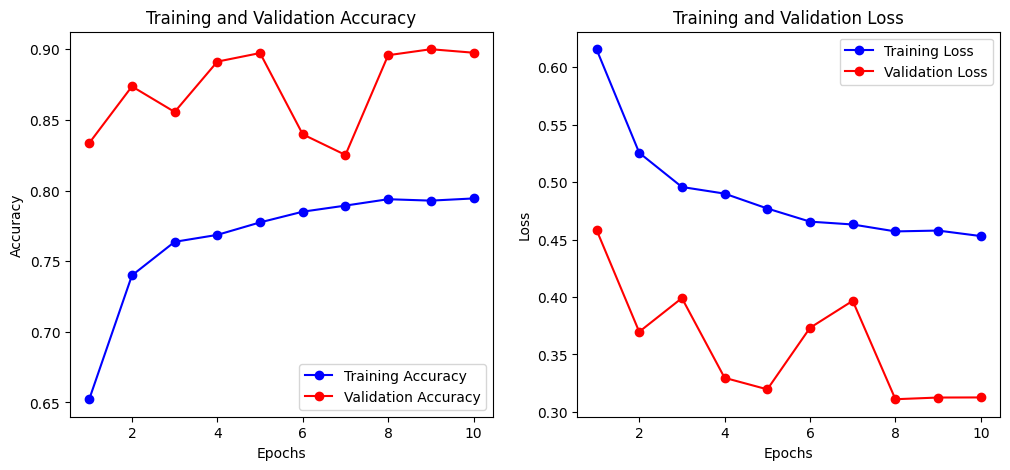

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Fine-Tuning**

In [25]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model_phase2.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [29]:
vgg19_base = model.get_layer('vgg19')

vgg19_base.trainable = True

for layer in vgg19_base.layers[:-4]:
    layer.trainable = False

for layer in vgg19_base.layers:
  print(f"{layer.name}: Trainable = {layer.trainable}")

input_layer: Trainable = False
block1_conv1: Trainable = False
block1_conv2: Trainable = False
block1_pool: Trainable = False
block2_conv1: Trainable = False
block2_conv2: Trainable = False
block2_pool: Trainable = False
block3_conv1: Trainable = False
block3_conv2: Trainable = False
block3_conv3: Trainable = False
block3_conv4: Trainable = False
block3_pool: Trainable = False
block4_conv1: Trainable = False
block4_conv2: Trainable = False
block4_conv3: Trainable = False
block4_conv4: Trainable = False
block4_pool: Trainable = False
block5_conv1: Trainable = False
block5_conv2: Trainable = True
block5_conv3: Trainable = True
block5_conv4: Trainable = True
block5_pool: Trainable = True


In [31]:
model = models.Sequential([
    vgg19_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [32]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

In [ ]:
history_fn = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.8148 - loss: 0.4065
Epoch 1: val_loss improved from inf to 0.26892, saving model to best_model_phase2.keras
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 827s 515ms/step - accuracy: 0.8149 - loss: 0.4064 - val_accuracy: 0.8931 - val_loss: 0.2689
Epoch 2/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9169 - loss: 0.2132
Epoch 2: val_loss improved from 0.26892 to 0.13582, saving model to best_model_phase2.keras
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 812s 510ms/step - accuracy: 0.9169 - loss: 0.2132 - val_accuracy: 0.9456 - val_loss: 0.1358
Epoch 3/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9329 - loss: 0.1765
Epoch 3: val_loss did not improve from 0.13582
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 808s 507ms/step - accuracy: 0.9329 - loss: 0.1765 - val_accuracy: 0.9405 - val_loss: 0.1482
Epoch 4/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9459 - loss: 0.1497
Epoch 4: val_loss improved from 0.13582 to 0